In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [31]:
data_path = "/kaggle/input/bike-sharing-demand/"

train = pd.read_csv(data_path + "train.csv") # 훈련 데이터
test = pd.read_csv(data_path + "test.csv") # 테스트 데이터
submission = pd.read_csv(data_path + "sampleSubmission.csv") # 제출 샘플 데이터

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [33]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [36]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


In [37]:
print(train["datetime"][100]) # datetime 100번째 원소
print(train["datetime"][100].split()) # 공백 기준으로 문자열 나누기
print(train["datetime"][100].split()[0]) # 날짜
print(train["datetime"][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [38]:
train["date"] = train["datetime"].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train["year"] = train["datetime"].apply(lambda x: x.split()[0].split('-')[0])
train["month"] = train["datetime"].apply(lambda x: x.split()[0].split('-')[1])
train["day"] = train["datetime"].apply(lambda x: x.split()[0].split('-')[2])
train["hour"] = train["datetime"].apply(lambda x: x.split()[1].split(':')[0])
train["minute"] = train["datetime"].apply(lambda x: x.split()[1].split(':')[1])
train["second"] = train["datetime"].apply(lambda x: x.split()[1].split(':')[2])

In [39]:
from datetime import datetime # datetime 라이브러리 임포트
import calendar

# 요일(weekday) 피처 추가
train["weekday"] = train["date"].apply(lambda x: calendar.day_name[datetime.strptime(x, "%Y-%m-%d").weekday()])

# season 피처 추가
train["season"] = train["season"].map({1: "Spring",
                                      2: "Summer",
                                      3: "Fall",
                                      4: "Winter"})

# weather 피처 추가
train["weather"] = train["weather"].map({1: "Clear",
                                        2: "Mist, Few Clouds",
                                        3: "Light Snow, Rain, Thunderstorm",
                                        4: "Heavy Rain, Thunderstorm, Snow, Fog"})

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


date 피처가 제공하는 정보는 모두 year, month, day 피처에도 있어서 추후 date 피처는 제거가 필요해보임.

또한, 3달씩 month 피처를 묶으면 season 피처로 해석이 가능하니 month 피처도 제거가 필요해보임.

In [40]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


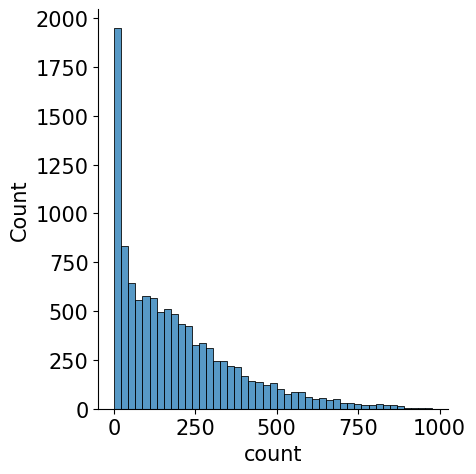

In [41]:
mpl.rc("font", size=15) # 폰트 크기를 15로 설정
sns.displot(train["count"]) # 분포토 출력

x축은 타깃값인 count를 나타내고

y축은 총 개수를 나타냄

분포도를 보면 타깃값인 count가 0 근처에 몰려있음을 확인할 수 있음

즉, 분포가 왼쪽으로 많이 편향되어 있음.

회귀 모델이 좋은 성능을 내려면 데이터가 정규분포를 따라야 하므로, 로그 변환 하도록 함

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


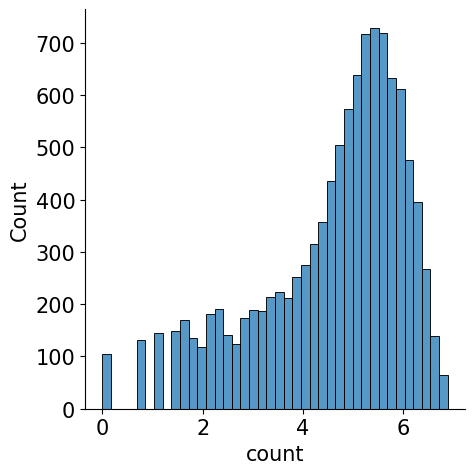

In [42]:
sns.displot(np.log(train["count"]))

변환 전보다 정규분포에 가까워졌음을 확인할 수 있음

피처를 바로 활용해 count를 예측하는 것보다 log(count)를 예측하는 편이 더 정확할 듯.

따라서, 타깃값을 log(count)로 변환해 사용할 필요가 있음

다만, 마지막에 지수변환을 하여 실제 타깃값인 count로 복원해야 함

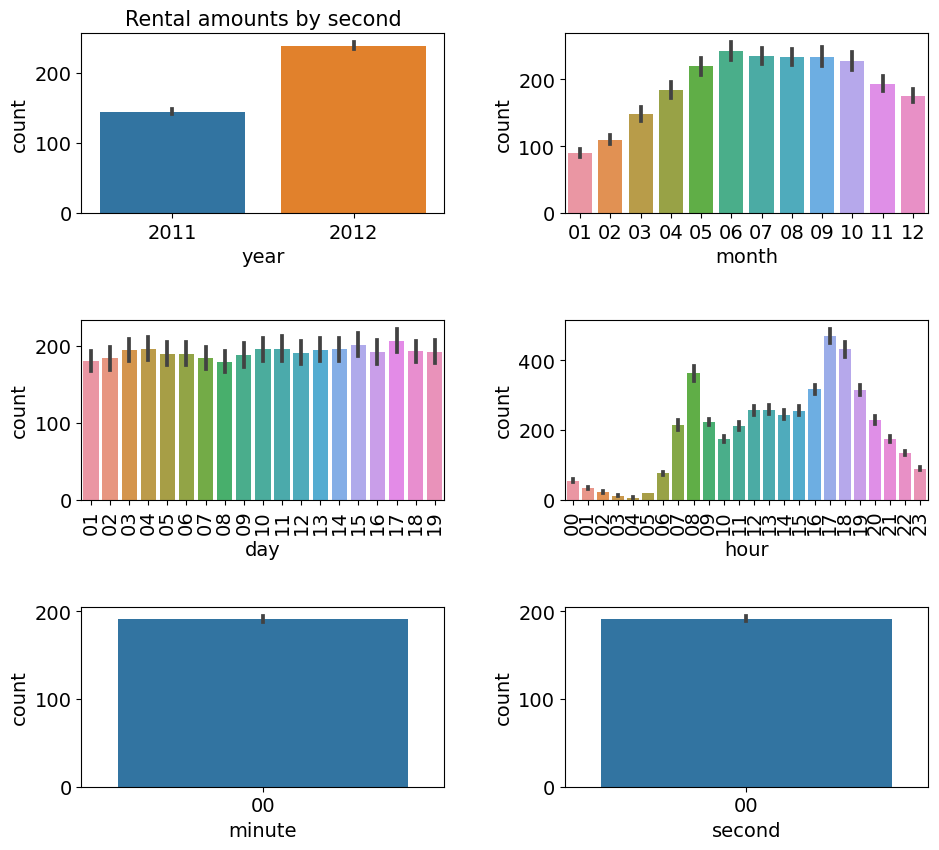

In [43]:
# m행 n열 Figure 준비
mpl.rc("font", size=14) # 폰트 크기 설정
mpl.rc("axes", titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10 * 9 인치로 설정

# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x="year", y="count", data=train, ax=axes[0, 0])
sns.barplot(x="month", y="count", data=train, ax=axes[0, 1])
sns.barplot(x="day", y="count", data=train, ax=axes[1, 0])
sns.barplot(x="hour", y="count", data=train, ax=axes[1, 1])
sns.barplot(x="minute", y="count", data=train, ax=axes[2, 0])
sns.barplot(x="second", y="count", data=train, ax=axes[2, 1])

# 서브플롯에 제목 달기
axes[0, 0].set(title="Rental amounts by year")
axes[0, 0].set(title="Rental amounts by month")
axes[0, 0].set(title="Rental amounts by day")
axes[0, 0].set(title="Rental amounts by hour")
axes[0, 0].set(title="Rental amounts by minute")
axes[0, 0].set(title="Rental amounts by second")

# 1행에 위치한 서브플롯의 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

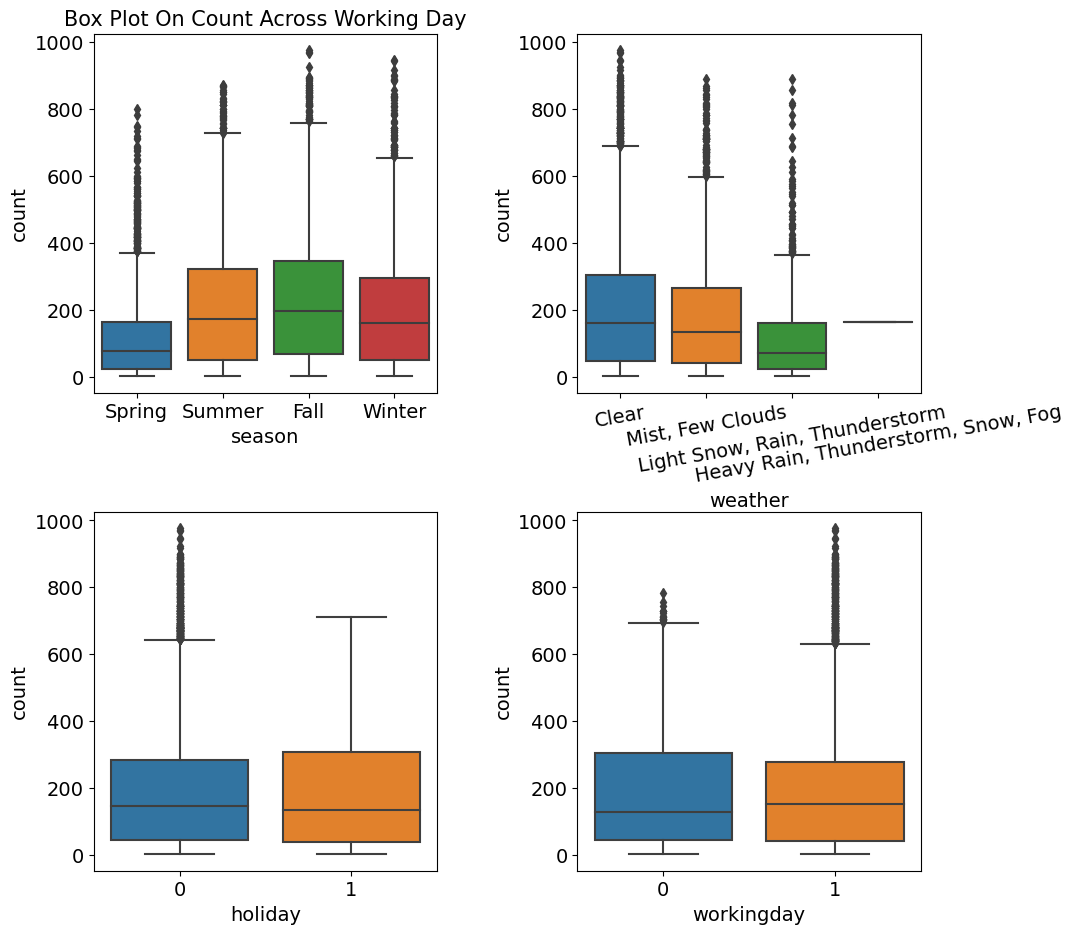

In [44]:
# m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x="season", y="count", data=train, ax=axes[0, 0])
sns.boxplot(x="weather", y="count", data=train, ax=axes[0, 1])
sns.boxplot(x="holiday", y="count", data=train, ax=axes[1, 0])
sns.boxplot(x="workingday", y="count", data=train, ax=axes[1, 1])

# 세부 설정
# 서브플롯에 제목 달기
axes[0, 0].set(title="Box Plot On Count Across Season")
axes[0, 0].set(title="Box Plot On Count Across Weather")
axes[0, 0].set(title="Box Plot On Count Across Holiday")
axes[0, 0].set(title="Box Plot On Count Across Working Day")

# x축 라벨 겹침 해결
axes[0, 1].tick_params(axis='x', labelrotation=10) # 10도 회전

<Axes: xlabel='hour', ylabel='count'>

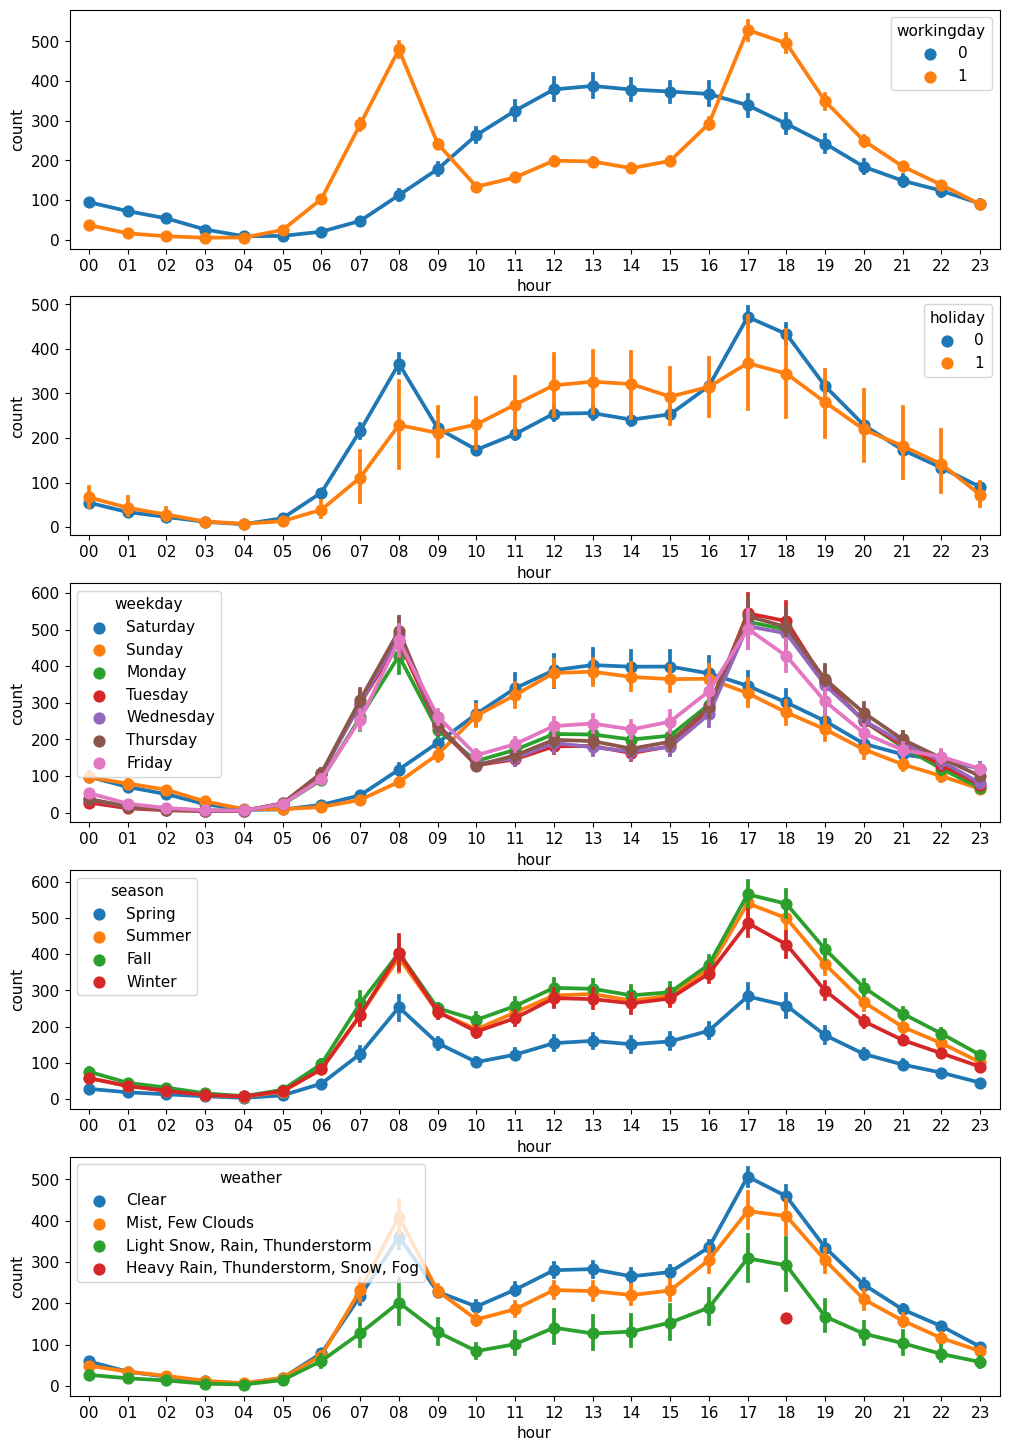

In [45]:
# m행 n열 Figure 준비
mpl.rc("font", size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x="hour", y="count", data=train, hue="workingday", ax=axes[0])
sns.pointplot(x="hour", y="count", data=train, hue="holiday", ax=axes[1])
sns.pointplot(x="hour", y="count", data=train, hue="weekday", ax=axes[2])
sns.pointplot(x="hour", y="count", data=train, hue="season", ax=axes[3])
sns.pointplot(x="hour", y="count", data=train, hue="weather", ax=axes[4])

<Axes: xlabel='humidity', ylabel='count'>

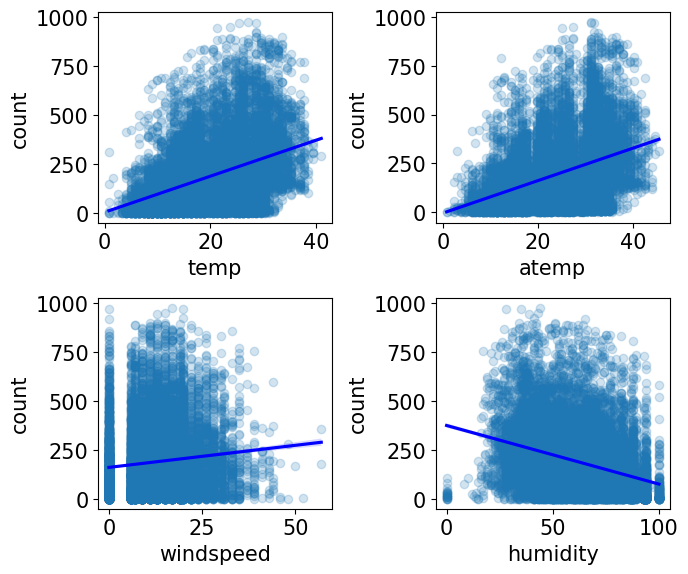

In [46]:
# m행 n열 Figure 준비
mpl.rc("font", size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x="temp", y="count", data=train, ax=axes[0, 0], scatter_kws={"alpha": 0.2}, line_kws={"color": "blue"})
sns.regplot(x="atemp", y="count", data=train, ax=axes[0, 1], scatter_kws={"alpha": 0.2}, line_kws={"color": "blue"})
sns.regplot(x="windspeed", y="count", data=train, ax=axes[1, 0], scatter_kws={"alpha": 0.2}, line_kws={"color": "blue"})
sns.regplot(x="humidity", y="count", data=train, ax=axes[1, 1], scatter_kws={"alpha": 0.2}, line_kws={"color": "blue"})

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

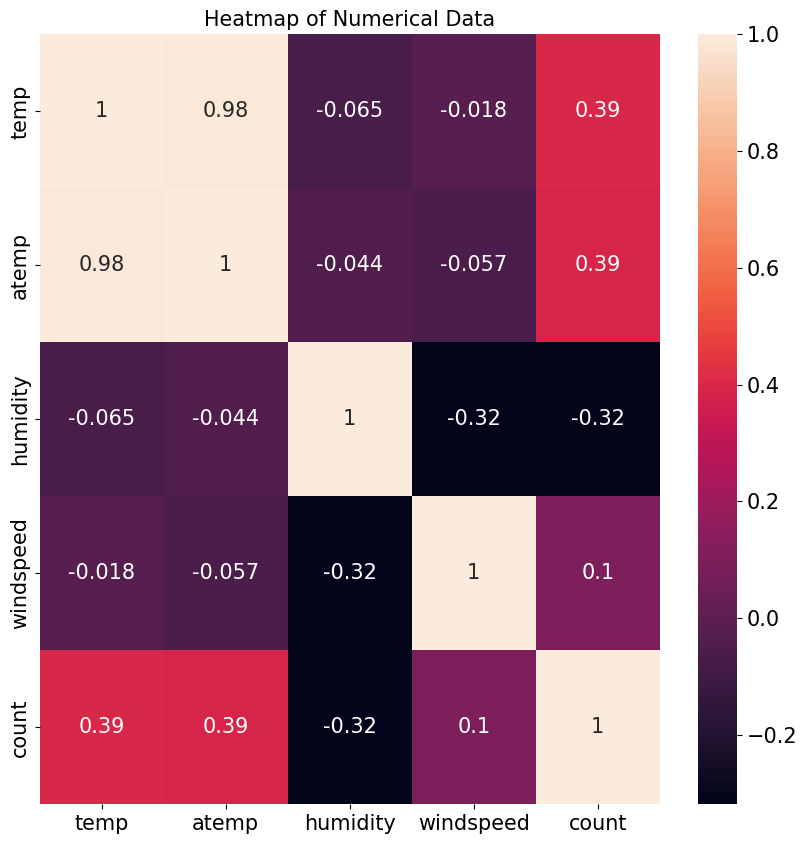

In [47]:
# 피처 간 상관관계 매트릭스
corrMat = train[["temp", "atemp", "humidity", "windspeed", "count"]].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title="Heatmap of Numerical Data")